In [96]:
import numpy
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.patches as patches
import mpl_toolkits.mplot3d

In [97]:
r_rfw = 110
rx_length = 470
bar_width = 5
x_origin_offset = 104.5 + bar_width / 2
y_origin_offset = rx_length - 113.5 - bar_width / 2
z_offset = 72.19 - bar_width
z_interval = 10

In [98]:
xc_0_raw  = 131.4555
xc_10_raw = 131.15675
yc_0_raw = 123.6535
yc_10_raw = 123.2858333
yc_20_raw = 122.5325
yc_40_raw = 121.7695

In [99]:
xc_0 = xc_0_raw + x_origin_offset
xc_10 = xc_10_raw + x_origin_offset
yc_0 = y_origin_offset - yc_0_raw
yc_10  = y_origin_offset - yc_10_raw
yc_20 = y_origin_offset - yc_20_raw
yc_40 = y_origin_offset - yc_40_raw

In [100]:
x = [xc_0, xc_10]
y = [yc_0, yc_10]
z = [z_offset + z_interval]
r0 = 10

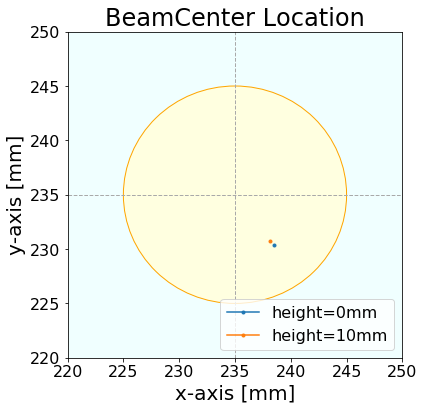

In [102]:
fig = plt.figure(figsize=(6,6))
ax = plt.axes()
c = patches.Circle(xy=(rx_length/2, rx_length/2), radius=r_rfw, fc='azure', ec='gray', lw=2)
ax.add_patch(c)
c0 = patches.Circle(xy=(rx_length/2, rx_length/2), radius=r0, fc='lightyellow', ec='orange')
ax.add_patch(c0)

ax.plot(xc_0, yc_0, marker='o', markersize=3, label='height=0mm')
ax.plot(xc_10, yc_10, marker='o', markersize=3, label='height=10mm')
plt.plot([0, rx_length],[rx_length/2, rx_length/2], 'darkgray', linestyle='dashed', lw=1)
plt.plot([rx_length/2, rx_length/2], [0, rx_length], 'darkgray', linestyle='dashed', lw=1)

plt.title('BeamCenter Location', size=24)
plt.xlabel('x-axis [mm]', size=20)
plt.ylabel('y-axis [mm]', size=20)
lim = 220
plt.xlim(0+lim, rx_length-lim)
plt.ylim(0+lim, rx_length-lim)
# plt.grid()
plt.legend(fontsize=16, loc='lower right')
plt.tick_params(labelsize=16)

plt.show()

A = (3.4555000000000007, -4.653500000000008)
B = (3.156749999999988, -4.285833299999979)


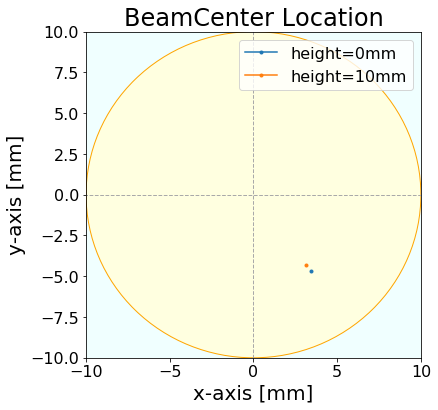

In [106]:
# 電波窓の中心を中心とする

fig = plt.figure(figsize=(6,6))
ax = plt.axes()
c = patches.Circle(xy=(0, 0), radius=r_rfw, fc='azure', ec='gray', lw=2)
ax.add_patch(c)
c0 = patches.Circle(xy=(0, 0), radius=r0, fc='lightyellow', ec='orange')
ax.add_patch(c0)

ax.plot(xc_0-rx_length/2, yc_0-rx_length/2, marker='o', markersize=3, label='height=0mm')
ax.plot(xc_10-rx_length/2, yc_10-rx_length/2, marker='o', markersize=3, label='height=10mm')
plt.plot([-rx_length/2, rx_length/2],[0, 0], 'darkgray', linestyle='dashed', lw=1)
plt.plot([0, 0], [-rx_length/2, rx_length/2], 'darkgray', linestyle='dashed', lw=1)

plt.title('BeamCenter Location', size=24)
plt.xlabel('x-axis [mm]', size=20)
plt.ylabel('y-axis [mm]', size=20)
lim = 10
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)
#plt.grid()
plt.legend(fontsize=16, loc='upper right')
plt.tick_params(labelsize=16)

print('A = ({}, {})'.format(x[0]-rx_length/2, y[0]-rx_length/2))
print('B = ({}, {})'.format(x[1]-rx_length/2, y[1]-rx_length/2))

plt.show()

In [83]:
a = numpy.array([x[0]-rx_length/2, y[0]-rx_length/2, 0])
b = numpy.array([x[1]-rx_length/2, y[1]-rx_length/2, 10])
ab = b - a
z = numpy.array([0, 0, 1])

In [84]:
# ab と z がなす角
lab = numpy.linalg.norm(ab)
lz = numpy.linalg.norm(z)
dabz = numpy.dot(ab, z)
th = numpy.arccos(dabz / (lab * lz))
print(th * 180 / numpy.pi)

2.71230709115


In [91]:
# それぞれの傾きから合成する
thx = 1.54 * numpy.pi /180
thy = 1.52 * numpy.pi /180
a = numpy.array([-numpy.tan(thx), 0, 1])
b = numpy.array([0, numpy.tan(thy), 1])
c = a + b
z = numpy.array([0, 0, 1])
lc = numpy.linalg.norm(c)
lz = numpy.linalg.norm(z)
dcz = numpy.dot(c, z)
_th = numpy.arccos(dcz / (lc * lz))
print(_th * 180 / numpy.pi)

1.08202512126
